In [ ]:
from mpgm.mpgm.evaluation.generating_samples import *
from mpgm.mpgm.models.SPGM import SPGM
import matplotlib.pyplot as plt
import numpy as np
import time

import sympy
import cvxopt
import qpsolvers
import qpoases
from quadprog import solve_qp

from typing import Dict, Optional, Any

from mpgm.mpgm.model_fitters.prox_grad_fitters import Constrained_Prox_Grad_Fitter

import scipy
from functools import partial

SyntaxError: positional argument follows keyword argument (prox_grad_fitters.py, line 167)

In [7]:
gg = LatticeGraphGenerator()
wa = Bimodal_Gaussian_Weight_Assigner(mean_1=-0.1,
                                     std_1=0.02,
                                     mean_2=0.1,
                                     std_2=0.02,
                                     split=0.4)
np.random.seed(0)
    
G = gg.generate_graph(nr_variables=10)
wa.assign_weights(G)
model = TPGM(R=10, theta=G)
sampler = TPGMGibbsSampler(burn_in=50, thinning_nr=150)
    
samples = sampler.generate_samples(model, np.zeros((10, )), 150)

100%|██████████| 22401/22401 [00:17<00:00, 1287.30it/s]


In [24]:

model = SPGM(R=10, R0=5)

theta_init = np.random.normal(0, 0.01, (10, 10))

In [15]:
fitter = Constrained_Prox_Grad_Fitter(0.5, accelerated='True')
a,b,c,d,e = fitter.fit_node(1, model.calculate_nll, model.calculate_grad_nll, samples, theta_init)
# ret = fitter.call_fit_node(model.calculate_nll, model.calculate_grad_nll, samples, theta_init, True)

Before: alpha=0.5 [9.04224082e-01 6.92260339e-04 9.07966202e-01 9.04753184e-01
 9.06086065e-01 9.06137946e-01 9.05149577e-01 9.07016334e-01
 9.07518251e-01 9.06633390e-01]
After: [9.04224293e-01 6.92829048e-04 9.07966431e-01 9.04753309e-01
 9.06086514e-01 9.06138441e-01 9.05149811e-01 9.07016414e-01
 9.07518386e-01 9.06633821e-01]
Status: optimal 6
Before: alpha=0.25 [0.45112537 0.00052075 0.45486749 0.45165447 0.45298735 0.45303923
 0.45205086 0.45391762 0.45441954 0.45353468]
After: [0.45112539 0.0005208  0.45486751 0.45165449 0.4529874  0.45303928
 0.45205089 0.45391763 0.45441955 0.45353472]
Status: optimal 6
Before: alpha=0.125 [0.22457601 0.00043499 0.22831813 0.22510511 0.22643799 0.22648987
 0.22550151 0.22736826 0.22787018 0.22698532]
After: [0.22457601 0.000435   0.22831813 0.22510511 0.22643799 0.22648988
 0.22550151 0.22736826 0.22787018 0.22698532]
Status: optimal 6
Before: alpha=0.0625 [0.11130133 0.00039212 0.11504345 0.11183043 0.11316331 0.1132152
 0.11222683 0.1140935

After: [-0.00169424  0.00064715  0.00204255 -0.00109596  0.00037504  0.0006247
 -0.00072189  0.00101819  0.0015217   0.00091629]
Status: optimal 168
Before: alpha=1.9073486328125e-06 [-0.0016908   0.00064713  0.00204599 -0.00109252  0.00037848  0.00062814
 -0.00071845  0.00102163  0.00152514  0.00091973]
After: [-0.00168901  0.00065055  0.00204821 -0.00108927  0.00038261  0.00063493
 -0.00071616  0.00102278  0.00152649  0.00092398]
Status: optimal 9
Before: alpha=0 [-0.00167693  0.00066106  0.00206111 -0.00107331  0.00040205  0.00066232
 -0.00070241  0.00103256  0.00153666  0.00094347]
After: [-0.00167693  0.00066106  0.00206111 -0.00107331  0.00040205  0.00066232
 -0.00070241  0.00103256  0.00153666  0.00094347]
Status: optimal 167
Before: alpha=1.9073486328125e-06 [-0.00167349  0.00066105  0.00206455 -0.00106987  0.00040549  0.00066576
 -0.00069898  0.001036    0.0015401   0.00094691]
After: [-0.0016721   0.00066369  0.00206628 -0.00106734  0.00040868  0.00067099
 -0.00069721  0.0010

After: [-0.00155316  0.00075789  0.00219691 -0.00090989  0.00059054  0.00092278
 -0.00056619  0.00113826  0.00164865  0.00113649]
Status: optimal 167
Before: alpha=4.76837158203125e-07 [-0.0015523   0.00075789  0.00219777 -0.00090904  0.0005914   0.00092364
 -0.00056534  0.00113911  0.00164951  0.00113735]
After: [-0.00155189  0.00075864  0.00219831 -0.00090832  0.00059225  0.00092498
 -0.00056488  0.00113942  0.00164989  0.00113829]
Status: optimal 9
Before: alpha=2.384185791015625e-07 [-0.00155273  0.00075789  0.00219734 -0.00090947  0.00059097  0.00092321
 -0.00056577  0.00113868  0.00164908  0.00113692]
After: [-0.00155232  0.00075864  0.00219789 -0.00090874  0.00059183  0.00092456
 -0.00056531  0.00113899  0.00164947  0.00113787]
Status: optimal 9
Before: alpha=0 [-0.00154511  0.00076398  0.00220591 -0.00089931  0.00060242  0.0009389
 -0.00055758  0.00114533  0.00165626  0.0011489 ]
After: [-0.00154511  0.00076398  0.00220591 -0.00089931  0.00060242  0.0009389
 -0.00055758  0.0011

After: [-0.00145856  0.00082901  0.00230374 -0.00078586  0.00072823  0.00110763
 -0.00046651  0.00122252  0.00173983  0.001282  ]
Status: optimal 167
Before: alpha=1.1920928955078125e-07 [-0.00145834  0.00082901  0.00230396 -0.00078565  0.00072844  0.00110784
 -0.0004663   0.00122274  0.00174005  0.00128222]
After: [-0.00145813  0.00082939  0.00230425 -0.00078528  0.00072886  0.00110848
 -0.00046608  0.00122291  0.00174026  0.0012827 ]
Status: optimal 9
Before: alpha=0 [-0.00145204  0.00083393  0.00231119 -0.00077733  0.00073761  0.0011201
 -0.00045975  0.0012284   0.00174624  0.00129204]
After: [-0.00145204  0.00083393  0.00231119 -0.00077733  0.00073761  0.0011201
 -0.00045975  0.0012284   0.00174624  0.00129204]
Status: optimal 167
Before: alpha=1.1920928955078125e-07 [-0.00145182  0.00083393  0.0023114  -0.00077712  0.00073783  0.00112031
 -0.00045953  0.00122861  0.00174645  0.00129225]
After: [-0.00145162  0.0008343   0.00231168 -0.00077677  0.00073823  0.00112092
 -0.00045932  0

After: [-0.00137464  0.00089323  0.00240027 -0.00067601  0.00084871  0.00126687
 -0.00038018  0.00129859  0.00182307  0.00141173]
Status: optimal 166
Before: alpha=1.1920928955078125e-07 [-0.00137443  0.00089323  0.00240049 -0.00067579  0.00084892  0.00126708
 -0.00037996  0.00129881  0.00182328  0.00141195]
After: [-0.0013743   0.00089346  0.00240067 -0.00067557  0.00084917  0.00126746
 -0.00037983  0.00129891  0.00182342  0.00141224]
Status: optimal 9
Before: alpha=0 [-0.00136893  0.00089749  0.00240685 -0.0006686   0.00085678  0.00127741
 -0.00037436  0.00130382  0.00182879  0.00142047]
After: [-0.00136893  0.00089749  0.00240685 -0.0006686   0.00085678  0.00127741
 -0.00037436  0.00130382  0.00182879  0.00142047]
Status: optimal 166
Before: alpha=1.1920928955078125e-07 [-0.00136872  0.00089748  0.00240707 -0.00066839  0.00085699  0.00127763
 -0.00037415  0.00130403  0.001829    0.00142069]
After: [-0.00136859  0.00089771  0.00240724 -0.00066818  0.00085724  0.00127799
 -0.00037402 

After: [-0.00130404  0.00094601  0.00248195 -0.00058454  0.00094832  0.00139641
 -0.00030858  0.00136341  0.00189414  0.00151989]
Status: optimal 9
Before: alpha=0 [-0.00129927  0.00094967  0.00248751 -0.00057833  0.00095509  0.00140521
 -0.00030376  0.00136779  0.00189896  0.00152727]
After: [-0.00129927  0.00094967  0.00248751 -0.00057833  0.00095509  0.00140521
 -0.00030376  0.00136779  0.00189896  0.00152727]
Status: optimal 167
Before: alpha=5.960464477539063e-08 [-0.00129917  0.00094967  0.00248761 -0.00057823  0.00095519  0.00140531
 -0.00030365  0.0013679   0.00189907  0.00152737]
After: [-0.00129908  0.00094983  0.00248774 -0.00057808  0.00095536  0.00140557
 -0.00030356  0.00136797  0.00189916  0.00152757]
Status: optimal 9
Before: alpha=0 [-0.00129435  0.00095347  0.00249325 -0.00057192  0.00096207  0.00141429
 -0.00029879  0.00137232  0.00190395  0.00153489]
After: [-0.00129435  0.00095347  0.00249325 -0.00057192  0.00096207  0.00141429
 -0.00029879  0.00137232  0.00190395 

After: [-0.00123741  0.00099705  0.0025597  -0.00049808  0.00104245  0.00151828
 -0.00024153  0.00142481  0.00196178  0.00162276]
Status: optimal 9
Before: alpha=0 [-0.00123298  0.00100039  0.00256487 -0.00049236  0.00104867  0.00152628
 -0.00023709  0.00142891  0.00196629  0.00162956]
After: [-0.00123298  0.00100039  0.00256487 -0.00049236  0.00104867  0.00152628
 -0.00023709  0.00142891  0.00196629  0.00162956]
Status: optimal 167
Before: alpha=5.960464477539063e-08 [-0.00123287  0.00100039  0.00256497 -0.00049225  0.00104878  0.00152639
 -0.00023698  0.00142902  0.0019664   0.00162967]
After: [-0.00123281  0.00100051  0.00256506 -0.00049215  0.0010489   0.00152656
 -0.00023692  0.00142907  0.00196646  0.00162981]
Status: optimal 9
Before: alpha=0 [-0.00122839  0.00100382  0.00257022 -0.00048645  0.00105509  0.00153453
 -0.00023248  0.00143316  0.00197097  0.00163659]
After: [-0.00122839  0.00100382  0.00257022 -0.00048645  0.00105509  0.00153453
 -0.00023248  0.00143316  0.00197097 

After: [-0.00081897  0.00168597  0.00314028  0.00017122  0.00180997  0.00261277
  0.00016227  0.00178573  0.0024113   0.00252359]
Status: optimal 8
Before: alpha=5.960464477539063e-08 [-0.00081886  0.00168597  0.00314038  0.00017133  0.00181008  0.00261288
  0.00016237  0.00178583  0.0024114   0.00252369]
After: [-0.000818    0.00168751  0.00314166  0.0001727   0.00181168  0.00261506
  0.00016314  0.00178662  0.00241239  0.00252563]
Status: optimal 8
Before: alpha=0 [-0.00077213  0.00176507  0.00320616  0.00024648  0.00189647  0.00273551
  0.00020687  0.00182641  0.00246222  0.00262577]
After: [-0.00077139  0.0017664   0.00320726  0.00024767  0.00189785  0.00273738
  0.00020752  0.00182709  0.00246308  0.00262744]
Status: optimal 8
Before: alpha=5.960464477539063e-08 [-0.00077128  0.0017664   0.00320737  0.00024777  0.00189795  0.00273748
  0.00020763  0.0018272   0.00246319  0.00262755]
After: [-0.00077055  0.00176771  0.00320846  0.00024894  0.00189931  0.00273932
  0.00020828  0.001

After: [-0.0002027   0.00271999  0.00401082  0.00115495  0.00294139  0.00420293
  0.0007436   0.00232711  0.00308688  0.00386331]
Status: optimal 8
Before: alpha=5.960464477539063e-08 [-0.00020259  0.00271999  0.00401092  0.00115505  0.00294149  0.00420304
  0.00074371  0.00232722  0.00308699  0.00386341]
After: [-0.00020244  0.00272026  0.00401115  0.00115529  0.00294177  0.0042034
  0.00074384  0.00232736  0.00308717  0.00386376]
Status: optimal 8
Before: alpha=0 [-0.00016417  0.00278375  0.00406525  0.00121594  0.00301153  0.00430069
  0.00077972  0.00236126  0.00312932  0.00394644]
After: [-0.00016402  0.00278401  0.00406548  0.00121617  0.00301181  0.00430105
  0.00077984  0.0023614   0.0031295   0.00394678]
Status: optimal 8
Before: alpha=5.960464477539063e-08 [-0.00016392  0.00278401  0.00406558  0.00121628  0.00301191  0.00430115
  0.00077995  0.00236151  0.0031296   0.00394688]
After: [-0.00016378  0.00278426  0.0040658   0.0012165   0.00301217  0.00430148
  0.00078006  0.0023

After: [0.00021449 0.00340206 0.00459935 0.00181159 0.00369629 0.00525008
 0.00113375 0.00269857 0.00354714 0.00475786]
Status: optimal 8
Before: alpha=0 [0.00024468 0.00345087 0.00464187 0.00185886 0.00375061 0.00532513
 0.00116193 0.00272555 0.00358048 0.00482222]
After: [0.00024475 0.00345099 0.00464197 0.00185897 0.00375073 0.00532529
 0.00116198 0.00272561 0.00358056 0.00482237]
Status: optimal 8
Before: alpha=2.9802322387695312e-08 [0.0002448  0.00345099 0.00464202 0.00185902 0.00375078 0.00532534
 0.00116203 0.00272566 0.00358061 0.00482242]
After: [0.00024485 0.00345108 0.0046421  0.0018591  0.00375088 0.00532546
 0.00116208 0.00272571 0.00358067 0.00482254]
Status: optimal 8
Before: alpha=0 [0.00027443 0.00349884 0.00468375 0.00190538 0.00380406 0.00539889
 0.00118967 0.00275216 0.00361334 0.00488554]
After: [0.00027449 0.00349895 0.00468384 0.00190547 0.00380417 0.00539904
 0.00118973 0.00275222 0.00361342 0.00488568]
Status: optimal 8
Before: alpha=2.9802322387695312e-08 [0.

After: [0.0006106  0.0040366  0.00515653 0.00242901 0.00440572 0.0062265
 0.00150279 0.00305375 0.00398511 0.00559823]
Status: optimal 8
Before: alpha=1.4901161193847656e-08 [0.00061062 0.0040366  0.00515656 0.00242904 0.00440574 0.00622652
 0.00150281 0.00305377 0.00398513 0.00559826]
After: [0.00061065 0.00403664 0.00515659 0.00242907 0.00440578 0.00622658
 0.00150283 0.00305379 0.00398516 0.00559831]
Status: optimal 8
Before: alpha=0 [0.00063294 0.00407212 0.00518794 0.00246371 0.00444558 0.00628119
 0.00152357 0.00307384 0.00400984 0.00564545]
After: [0.00063298 0.00407219 0.00518799 0.00246376 0.00444565 0.00628127
 0.0015236  0.00307387 0.00400988 0.00564553]
Status: optimal 8
Before: alpha=1.4901161193847656e-08 [0.000633   0.00407218 0.00518802 0.00246379 0.00444567 0.00628129
 0.00152363 0.0030739  0.00400991 0.00564555]
After: [0.00063302 0.00407222 0.00518805 0.00246382 0.00444571 0.00628134
 0.00152364 0.00307392 0.00400993 0.0056456 ]
Status: optimal 8
Before: alpha=0 [0.0

After: [0.0009059  0.00450313 0.0055713  0.00288616 0.00493099 0.00694511
 0.00177713 0.00331994 0.00431227 0.00622026]
Status: optimal 8
Before: alpha=1.4901161193847656e-08 [0.00090592 0.00450313 0.00557132 0.00288619 0.00493102 0.00694514
 0.00177715 0.00331996 0.0043123  0.00622028]
After: [0.00090594 0.00450316 0.00557135 0.00288621 0.00493105 0.00694518
 0.00177717 0.00331998 0.00431232 0.00622032]
Status: optimal 8
Before: alpha=0 [0.00092288 0.00452971 0.00559512 0.00291235 0.00496107 0.00698614
 0.00179289 0.00333529 0.0043311  0.00625586]
After: [0.0009229  0.00452976 0.00559515 0.00291238 0.00496112 0.00698619
 0.00179291 0.00333531 0.00433113 0.00625592]
Status: optimal 8
Before: alpha=1.4901161193847656e-08 [0.00092293 0.00452975 0.00559518 0.00291241 0.00496114 0.00698621
 0.00179293 0.00333534 0.00433116 0.00625594]
After: [0.00092294 0.00452978 0.0055952  0.00291243 0.00496117 0.00698625
 0.00179295 0.00333535 0.00433118 0.00625598]
Status: optimal 8
Before: alpha=0 [0.

After: [0.00111964 0.00483654 0.00587112 0.00321506 0.00530894 0.00745936
 0.00197525 0.00351353 0.0045495  0.00666759]
Status: optimal 8
Before: alpha=0 [0.00113307 0.00485741 0.00588996 0.00323568 0.00533263 0.00749153
 0.00198768 0.00352572 0.00456442 0.00669564]
After: [0.00113308 0.00485744 0.00588998 0.00323571 0.00533267 0.00749157
 0.0019877  0.00352573 0.00456444 0.00669568]
Status: optimal 8
Before: alpha=7.450580596923828e-09 [0.0011331  0.00485744 0.00589    0.00323572 0.00533268 0.00749159
 0.00198771 0.00352575 0.00456445 0.00669569]
After: [0.00113311 0.00485747 0.00589002 0.00323574 0.0053327  0.00749162
 0.00198772 0.00352576 0.00456447 0.00669572]
Status: optimal 8
Before: alpha=0 [0.00114633 0.004878   0.00590856 0.00325603 0.00535603 0.00752327
 0.00199995 0.00353776 0.00457916 0.00672333]
After: [0.00114634 0.00487803 0.00590859 0.00325606 0.00535606 0.00752331
 0.00199997 0.00353778 0.00457918 0.00672337]
Status: optimal 8
Before: alpha=7.450580596923828e-09 [0.00

After: [0.00130185 0.00511841 0.00612671 0.00349418 0.00562984 0.00789389
 0.00214374 0.00367928 0.00475217 0.00704732]
Status: optimal 8
Before: alpha=0 [0.00131261 0.00513498 0.00614181 0.00351063 0.00564876 0.00791944
 0.00215368 0.00368909 0.00476415 0.0070697 ]
After: [0.00131263 0.005135   0.00614183 0.00351065 0.00564879 0.00791947
 0.00215369 0.00368911 0.00476417 0.00706973]
Status: optimal 8
Before: alpha=7.450580596923828e-09 [0.00131264 0.005135   0.00614185 0.00351066 0.0056488  0.00791948
 0.0021537  0.00368912 0.00476418 0.00706975]
After: [0.00131265 0.00513502 0.00614187 0.00351068 0.00564882 0.00791951
 0.00215371 0.00368913 0.0047642  0.00706977]
Status: optimal 8
Before: alpha=0 [0.00132327 0.00515136 0.00615676 0.0035269  0.00566748 0.00794469
 0.00216352 0.00369882 0.00477602 0.00709184]
After: [0.00132328 0.00515138 0.00615678 0.00352692 0.0056675  0.00794472
 0.00216353 0.00369883 0.00477604 0.00709187]
Status: optimal 8
Before: alpha=7.450580596923828e-09 [0.00

After: [0.00153486 0.00550144 0.00646837 0.00385164 0.00604963 0.00844278
 0.00235172 0.00389876 0.00502242 0.00754722]
Status: optimal 7
Before: alpha=0 [0.00155759 0.0055404  0.00650265 0.00388661 0.00609124 0.00849609
 0.00237151 0.00392062 0.00504945 0.00759701]
After: [0.00155866 0.00554234 0.00650434 0.00388827 0.00609323 0.00849858
 0.00237239 0.00392169 0.00505077 0.00759945]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00155867 0.00554234 0.00650435 0.00388828 0.00609325 0.00849859
 0.0023724  0.0039217  0.00505078 0.00759946]
After: [0.00155966 0.00554416 0.00650591 0.00388981 0.00609511 0.00850091
 0.00237323 0.00392268 0.005052   0.0076017 ]
Status: optimal 7
Before: alpha=0 [0.00158406 0.00558621 0.00654285 0.00392738 0.00613988 0.00855811
 0.0023944  0.00394621 0.00508112 0.00765532]
After: [0.0015851  0.0055881  0.00654448 0.00392899 0.00614182 0.00856053
 0.00239525 0.00394725 0.0050824  0.00765769]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00

After: [0.00204345 0.00639453 0.00724894 0.00463633 0.00698979 0.00963284
 0.00278708 0.00439476 0.00563632 0.00867652]
Status: optimal 7
Before: alpha=0 [0.00208372 0.0064659  0.00731117 0.00469854 0.00706454 0.009727
 0.00282134 0.00443425 0.00568521 0.00876639]
After: [0.00208434 0.00646702 0.00731215 0.0046995  0.0070657  0.00972844
 0.00282185 0.00443487 0.00568597 0.0087678 ]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00208435 0.00646702 0.00731216 0.00469951 0.00706571 0.00972846
 0.00282186 0.00443488 0.00568599 0.00876781]
After: [0.00208497 0.00646818 0.00731315 0.00470048 0.0070669  0.00972993
 0.00282239 0.0044355  0.00568676 0.00876922]
Status: optimal 7
Before: alpha=0 [0.00212588 0.00654075 0.00737643 0.00476369 0.00714288 0.0098256
 0.00285719 0.00447565 0.00573647 0.00886057]
After: [0.00212648 0.00654182 0.00737736 0.00476461 0.00714399 0.00982698
 0.00285768 0.00447625 0.0057372  0.00886192]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00212

After: [0.00270721 0.00757653 0.00827906 0.00566277 0.00822531 0.0111851
 0.00335058 0.00504811 0.00644522 0.01016172]
Status: optimal 7
Before: alpha=0 [0.00275231 0.00765706 0.00834924 0.00573257 0.00830941 0.01129059
 0.00338884 0.00509261 0.00650031 0.0102628 ]
After: [0.00275263 0.00765764 0.00834974 0.00573306 0.00831001 0.01129132
 0.0033891  0.00509292 0.0065007  0.01026352]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00275264 0.00765764 0.00834976 0.00573307 0.00831002 0.01129134
 0.00338911 0.00509294 0.00650072 0.01026353]
After: [0.00275297 0.00765825 0.00835028 0.00573359 0.00831065 0.01129212
 0.00338939 0.00509326 0.00650113 0.01026428]
Status: optimal 7
Before: alpha=0 [0.00279811 0.00773886 0.00842053 0.00580344 0.00839483 0.01139769
 0.00342767 0.00513781 0.00655628 0.01036544]
After: [0.00279842 0.00773941 0.00842101 0.00580392 0.0083954  0.01139839
 0.00342792 0.00513811 0.00655665 0.01036613]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.002

After: [0.00338467 0.00878712 0.00933461 0.00671138 0.00948949 0.01276898
 0.0039248  0.0057175  0.00727381 0.01168058]
Status: optimal 7
Before: alpha=0 [0.00342815 0.00886483 0.00940241 0.00677868 0.00957065 0.01287059
 0.00396164 0.00576051 0.00732703 0.01177807]
After: [0.00342831 0.00886511 0.00940266 0.00677893 0.00957095 0.01287096
 0.00396177 0.00576067 0.00732723 0.01177843]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00342832 0.00886511 0.00940268 0.00677894 0.00957096 0.01287097
 0.00396178 0.00576068 0.00732724 0.01177844]
After: [0.00342848 0.00886542 0.00940294 0.0067792  0.00957128 0.01287137
 0.00396192 0.00576085 0.00732745 0.01177882]
Status: optimal 7
Before: alpha=0 [0.00347173 0.00894272 0.0094704  0.00684616 0.00965203 0.01297244
 0.00399857 0.00580364 0.0073804  0.01187581]
After: [0.00347189 0.008943   0.00947064 0.00684639 0.00965231 0.0129728
 0.00399869 0.00580379 0.00738059 0.01187615]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.003

After: [0.00401374 0.00991063 0.010316   0.00768506 0.01066374 0.01423811
 0.00445772 0.00634032 0.00804427 0.01309081]
Status: optimal 7
Before: alpha=0 [0.00405317 0.00998099 0.01037753 0.00774608 0.01073734 0.01433014
 0.00449113 0.00637939 0.00809259 0.01317919]
After: [0.00405326 0.00998113 0.01037766 0.00774621 0.01073749 0.01433033
 0.00449119 0.00637948 0.00809269 0.01317937]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00405327 0.00998113 0.01037767 0.00774622 0.0107375  0.01433034
 0.00449121 0.00637949 0.0080927  0.01317938]
After: [0.00405335 0.00998129 0.0103778  0.00774635 0.01073766 0.01433054
 0.00449128 0.00637957 0.0080928  0.01317957]
Status: optimal 7
Before: alpha=0 [0.00409249 0.0100511  0.01043887 0.00780691 0.01081069 0.01442186
 0.00452443 0.00641835 0.00814075 0.01326727]
After: [0.00409256 0.01005124 0.01043899 0.00780703 0.01081084 0.01442204
 0.00452449 0.00641843 0.00814085 0.01326744]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00

After: [0.00457565 0.01091151 0.01119257 0.00855421 0.01171172 0.01554802
 0.00493368 0.00689731 0.0087327  0.01434904]
Status: optimal 7
Before: alpha=0 [0.00461059 0.01097363 0.01124705 0.00860823 0.01177684 0.01562939
 0.00496328 0.00693196 0.0087755  0.01442722]
After: [0.00461064 0.01097372 0.01124713 0.00860831 0.01177693 0.01562951
 0.00496332 0.00693201 0.00877557 0.01442733]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00461065 0.01097372 0.01124715 0.00860832 0.01177695 0.01562952
 0.00496333 0.00693202 0.00877558 0.01442734]
After: [0.0046107  0.01097382 0.01124723 0.0086084  0.01177705 0.01562964
 0.00496337 0.00693208 0.00877564 0.01442746]
Status: optimal 7
Before: alpha=0 [0.00464536 0.01103542 0.01130127 0.00866198 0.01184163 0.01571033
 0.00499273 0.00696645 0.0088181  0.01450499]
After: [0.00464541 0.01103551 0.01130135 0.00866206 0.01184172 0.01571045
 0.00499277 0.0069665  0.00881816 0.01450511]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00

After: [0.00507305 0.01179406 0.01196802 0.00932283 0.01263807 0.01670499
 0.00535502 0.00739083 0.00934201 0.01546091]
Status: optimal 7
Before: alpha=0 [0.00510407 0.011849   0.01201637 0.00937075 0.01269581 0.01677708
 0.0053813  0.00742163 0.00938001 0.0155302 ]
After: [0.00510411 0.01184908 0.01201644 0.00937081 0.01269589 0.01677718
 0.00538133 0.00742167 0.00938007 0.0155303 ]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00510413 0.01184908 0.01201645 0.00937083 0.0126959  0.01677719
 0.00538135 0.00742168 0.00938008 0.01553031]
After: [0.00510417 0.01184916 0.01201652 0.00937089 0.01269598 0.01677729
 0.00538138 0.00742173 0.00938013 0.01553041]
Status: optimal 7
Before: alpha=0 [0.00513496 0.01190366 0.0120645  0.00941845 0.01275328 0.01684882
 0.00540747 0.0074523  0.00941784 0.01559917]
After: [0.005135   0.01190374 0.01206457 0.00941851 0.01275336 0.01684892
 0.0054075  0.00745234 0.0094179  0.01559926]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00

After: [0.00551616 0.0125768  0.01265834 0.01000685 0.01346202 0.01773326
 0.00573043 0.00783096 0.00988469 0.01644952]
Status: optimal 7
Before: alpha=0 [0.00554391 0.01262571 0.01270155 0.01004967 0.01351358 0.01779758
 0.00575394 0.00785854 0.00991867 0.01651137]
After: [0.00554394 0.01262577 0.01270161 0.01004973 0.01351365 0.01779767
 0.00575397 0.00785858 0.00991872 0.01651145]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00554395 0.01262577 0.01270162 0.01004974 0.01351366 0.01779768
 0.00575398 0.00785859 0.00991873 0.01651146]
After: [0.00554399 0.01262584 0.01270168 0.0100498  0.01351373 0.01779777
 0.00575401 0.00785863 0.00991878 0.01651155]
Status: optimal 7
Before: alpha=0 [0.00557154 0.01267438 0.01274459 0.0100923  0.01356492 0.01786161
 0.00577736 0.00788601 0.00995251 0.01657295]
After: [0.00557158 0.01267444 0.01274464 0.01009236 0.01356499 0.0178617
 0.00577739 0.00788605 0.00995256 0.01657303]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.005

After: [0.00591371 0.01327553 0.01327716 0.01061987 0.01419998 0.01865346
 0.00606732 0.00822629 0.01037142 0.01733457]
Status: optimal 7
Before: alpha=0 [0.0059387  0.01331934 0.01331604 0.01065838 0.01424633 0.01871124
 0.0060885  0.00825115 0.01040201 0.01739015]
After: [0.00593873 0.0133194  0.01331609 0.01065843 0.01424639 0.01871131
 0.00608853 0.00825119 0.01040205 0.01739022]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00593874 0.0133194  0.0133161  0.01065844 0.0142464  0.01871132
 0.00608854 0.0082512  0.01040206 0.01739023]
After: [0.00593877 0.01331945 0.01331615 0.01065849 0.01424646 0.0187114
 0.00608856 0.00825123 0.0104021  0.0173903 ]
Status: optimal 7
Before: alpha=0 [0.0059636  0.01336295 0.01335477 0.01069675 0.01429249 0.01876877
 0.0061096  0.00827593 0.01043248 0.0174455 ]
After: [0.00596363 0.01336301 0.01335482 0.0106968  0.01429255 0.01876884
 0.00610963 0.00827596 0.01043252 0.01744557]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.005

After: [0.00627278 0.0139031  0.01383552 0.01117287 0.01486522 0.01948231
 0.0063717  0.00858376 0.01081085 0.01813206]
Status: optimal 7
Before: alpha=0 [0.00629543 0.01394258 0.01387072 0.01120773 0.01490714 0.01953452
 0.00639091 0.00860632 0.01083856 0.01818231]
After: [0.00629546 0.01394263 0.01387077 0.01120778 0.01490719 0.01953459
 0.00639093 0.00860635 0.0108386  0.01818237]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00629547 0.01394263 0.01387078 0.01120779 0.0149072  0.0195346
 0.00639094 0.00860636 0.01083861 0.01818238]
After: [0.0062955  0.01394268 0.01387082 0.01120783 0.01490726 0.01953467
 0.00639096 0.00860639 0.01083864 0.01818245]
Status: optimal 7
Before: alpha=0 [0.00631801 0.01398189 0.0139058  0.01124247 0.01494891 0.01958654
 0.00641005 0.00862881 0.01086618 0.01823237]
After: [0.00631804 0.01398194 0.01390585 0.01124251 0.01494896 0.01958661
 0.00641007 0.00862884 0.01086622 0.01823243]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.006

After: [0.00659916 0.01447001 0.01434243 0.01167481 0.01546857 0.02023342
 0.00664847 0.00890904 0.01121005 0.01885502]
Status: optimal 7
Before: alpha=0 [0.00661981 0.01450578 0.01437449 0.01170656 0.01550671 0.02028089
 0.00666599 0.00892964 0.01123531 0.01890071]
After: [0.00661984 0.01450582 0.01437453 0.0117066  0.01550676 0.02028095
 0.00666601 0.00892966 0.01123534 0.01890077]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00661985 0.01450582 0.01437454 0.01170661 0.01550677 0.02028096
 0.00666602 0.00892967 0.01123535 0.01890078]
After: [0.00661987 0.01450587 0.01437458 0.01170665 0.01550682 0.02028102
 0.00666604 0.0089297  0.01123539 0.01890084]
Status: optimal 7
Before: alpha=0 [0.00664041 0.01454141 0.01440645 0.01173821 0.01554473 0.02032819
 0.00668346 0.00895018 0.01126049 0.01894626]
After: [0.00664043 0.01454145 0.01440649 0.01173825 0.01554478 0.02032825
 0.00668348 0.0089502  0.01126052 0.01894631]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00

After: [0.0068976  0.01498492 0.01480533 0.01213311 0.01601898 0.02091803
 0.00690167 0.0092068  0.01157487 0.01951421]
Status: optimal 7
Before: alpha=0 [0.00691655 0.0150175  0.0148347  0.01216218 0.01605389 0.02096143
 0.00691775 0.00922572 0.01159802 0.01955601]
After: [0.00691657 0.01501754 0.01483474 0.01216222 0.01605393 0.02096149
 0.00691777 0.00922574 0.01159805 0.01955606]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00691659 0.01501754 0.01483475 0.01216223 0.01605394 0.0209615
 0.00691778 0.00922575 0.01159806 0.01955607]
After: [0.00691661 0.01501758 0.01483478 0.01216226 0.01605398 0.02096155
 0.0069178  0.00922578 0.01159809 0.01955612]
Status: optimal 7
Before: alpha=0 [0.00693545 0.01504996 0.01486399 0.01219117 0.01608869 0.0210047
 0.00693379 0.00924459 0.01162112 0.01959767]
After: [0.00693547 0.01505001 0.01486403 0.01219121 0.01608873 0.02100475
 0.00693381 0.00924461 0.01162115 0.01959773]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.0069

After: [0.00717208 0.01545502 0.01523041 0.01255389 0.01652389 0.02154548
 0.00713465 0.00948094 0.01191015 0.02011858]
Status: optimal 7
Before: alpha=0 [0.00718956 0.01548485 0.01525746 0.01258066 0.016556   0.02158537
 0.00714949 0.0094984  0.01193149 0.02015701]
After: [0.00718958 0.01548489 0.01525749 0.01258069 0.01655604 0.02158542
 0.00714951 0.00949842 0.01193152 0.02015706]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00718959 0.01548489 0.0152575  0.0125807  0.01655605 0.02158543
 0.00714952 0.00949843 0.01193153 0.02015707]
After: [0.00718961 0.01548492 0.01525753 0.01258074 0.01655609 0.02158548
 0.00714953 0.00949846 0.01193155 0.02015712]
Status: optimal 7
Before: alpha=0 [0.007207   0.01551458 0.01528444 0.01260737 0.01658802 0.02162515
 0.0071643  0.00951583 0.01195278 0.02019534]
After: [0.00720702 0.01551462 0.01528447 0.0126074  0.01658806 0.0216252
 0.00716432 0.00951585 0.01195281 0.02019538]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.007

After: [0.00742587 0.0158863  0.01562279 0.01294225 0.01698944 0.0221235
 0.0073502  0.00973466 0.01221991 0.02067555]
Status: optimal 7
Before: alpha=0 [0.00744207 0.01591374 0.01564782 0.01296703 0.01701913 0.02216035
 0.00736397 0.00975087 0.01223969 0.02071106]
After: [0.00744209 0.01591377 0.01564785 0.01296706 0.01701917 0.02216039
 0.00736398 0.00975089 0.01223971 0.0207111 ]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.0074421  0.01591377 0.01564786 0.01296707 0.01701918 0.0221604
 0.00736399 0.0097509  0.01223972 0.02071111]
After: [0.00744212 0.0159138  0.01564789 0.0129671  0.01701921 0.02216045
 0.00736401 0.00975092 0.01223974 0.02071115]
Status: optimal 7
Before: alpha=0 [0.00745825 0.01594109 0.0156728  0.01299175 0.01704875 0.0221971
 0.00737771 0.00976705 0.01225942 0.02074648]
After: [0.00745827 0.01594112 0.01567283 0.01299178 0.01704879 0.02219715
 0.00737773 0.00976707 0.01225944 0.02074652]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00745

After: [0.00766171 0.01628374 0.01598675 0.01330245 0.0174208  0.02265856
 0.00755064 0.00997067 0.01250753 0.0211913 ]
Status: optimal 7
Before: alpha=0 [0.0076768  0.01630908 0.01601003 0.01332549 0.01744838 0.02269274
 0.00756347 0.00998579 0.01252593 0.02122426]
After: [0.00767682 0.01630911 0.01601006 0.01332552 0.01744841 0.02269279
 0.00756349 0.00998581 0.01252595 0.0212243 ]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00767683 0.01630911 0.01601007 0.01332553 0.01744842 0.0226928
 0.0075635  0.00998582 0.01252596 0.02122431]
After: [0.00767685 0.01630914 0.01601009 0.01332556 0.01744845 0.02269284
 0.00756351 0.00998583 0.01252598 0.02122435]
Status: optimal 7
Before: alpha=0 [0.00769188 0.01633435 0.01603326 0.01334849 0.0174759  0.02272686
 0.00757629 0.01000088 0.0125443  0.02125715]
After: [0.0076919  0.01633438 0.01603329 0.01334851 0.01747593 0.0227269
 0.0075763  0.0100009  0.01254433 0.02125719]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.0076

After: [0.0078819  0.01665153 0.01632589 0.01363806 0.01782228 0.02315606
 0.00773791 0.01019123 0.0127758  0.02167104]
Status: optimal 7
Before: alpha=0 [0.00789603 0.01667503 0.01634763 0.01365958 0.017848   0.02318792
 0.00774993 0.01020539 0.01279301 0.02170176]
After: [0.00789605 0.01667506 0.01634766 0.0136596  0.01784804 0.02318796
 0.00774994 0.0102054  0.01279303 0.0217018 ]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00789606 0.01667505 0.01634767 0.01365961 0.01784805 0.02318797
 0.00774995 0.01020541 0.01279304 0.02170181]
After: [0.00789607 0.01667508 0.01634769 0.01365964 0.01784808 0.02318801
 0.00774997 0.01020543 0.01279306 0.02170185]
Status: optimal 7
Before: alpha=0 [0.00791014 0.01669847 0.01636934 0.01368106 0.01787368 0.02321973
 0.00776194 0.01021953 0.0128102  0.02173244]
After: [0.00791016 0.0166985  0.01636937 0.01368108 0.01787372 0.02321977
 0.00776195 0.01021955 0.01281022 0.02173248]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00

After: [0.00808839 0.0169932  0.01664325 0.01395209 0.01819753 0.0236206
 0.00791366 0.01039824 0.01302713 0.02211915]
Status: optimal 7
Before: alpha=0 [0.00810168 0.01701508 0.01666365 0.01397227 0.01822163 0.02365042
 0.00792497 0.01041156 0.01304329 0.02214791]
After: [0.00810169 0.0170151  0.01666367 0.01397229 0.01822166 0.02365045
 0.00792499 0.01041157 0.01304331 0.02214795]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.0081017  0.0170151  0.01666368 0.0139723  0.01822167 0.02365046
 0.007925   0.01041158 0.01304332 0.02214796]
After: [0.00810172 0.01701513 0.0166637  0.01397233 0.01822169 0.0236505
 0.00792501 0.0104116  0.01304334 0.02214799]
Status: optimal 7
Before: alpha=0 [0.00811494 0.0170369  0.01668401 0.01399242 0.01824569 0.02368019
 0.00793627 0.01042486 0.01305943 0.02217664]
After: [0.00811496 0.01703693 0.01668403 0.01399244 0.01824572 0.02368022
 0.00793628 0.01042488 0.01305945 0.02217667]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.0081

After: [0.00828284 0.01731177 0.01694142 0.01424711 0.01854966 0.02405607
 0.0080793  0.01059333 0.01326354 0.02253937]
Status: optimal 7
Before: alpha=0 [0.00829537 0.0173322  0.01696062 0.01426611 0.01857232 0.02408408
 0.00808998 0.0106059  0.01327877 0.0225664 ]
After: [0.00829538 0.01733223 0.01696064 0.01426613 0.01857235 0.02408411
 0.00808999 0.01060592 0.01327878 0.02256644]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00829539 0.01733223 0.01696065 0.01426614 0.01857236 0.02408412
 0.00809    0.01060593 0.01327879 0.02256645]
After: [0.00829541 0.01733225 0.01696068 0.01426616 0.01857238 0.02408416
 0.00809001 0.01060594 0.01327881 0.02256648]
Status: optimal 7
Before: alpha=0 [0.00830789 0.0173526  0.0169798  0.01428508 0.01859495 0.02411205
 0.00810065 0.01061847 0.01329398 0.0225934 ]
After: [0.00830791 0.01735262 0.01697982 0.0142851  0.01859498 0.02411208
 0.00810067 0.01061849 0.013294   0.02259343]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00

After: [0.00846664 0.0176098  0.01722261 0.01452531 0.01888132 0.0244658
 0.00823601 0.01077788 0.01348675 0.0229349 ]
Status: optimal 7
Before: alpha=0 [0.00847851 0.01762895 0.01724074 0.01454326 0.0189027  0.0244922
 0.00824614 0.01078981 0.01350116 0.02296039]
After: [0.00847852 0.01762898 0.01724077 0.01454328 0.01890273 0.02449223
 0.00824615 0.01078982 0.01350117 0.02296042]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00847853 0.01762897 0.01724078 0.01454329 0.01890274 0.02449224
 0.00824616 0.01078983 0.01350118 0.02296043]
After: [0.00847854 0.017629   0.0172408  0.01454331 0.01890276 0.02449227
 0.00824617 0.01078984 0.0135012  0.02296046]
Status: optimal 7
Before: alpha=0 [0.00849037 0.01764807 0.01725887 0.01456119 0.01892406 0.02451857
 0.00825626 0.01080172 0.01351555 0.02298585]
After: [0.00849038 0.01764809 0.01725889 0.01456121 0.01892409 0.0245186
 0.00825627 0.01080174 0.01351557 0.02298589]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00849

After: [0.00864101 0.0178895  0.0174887  0.01478857 0.01919479 0.02485263
 0.00838483 0.0109531  0.01369826 0.02330847]
Status: optimal 7
Before: alpha=0 [0.00865229 0.01790751 0.01750589 0.01480558 0.01921503 0.0248776
 0.00839446 0.01096444 0.01371193 0.02333259]
After: [0.0086523  0.01790753 0.01750591 0.0148056  0.01921506 0.02487763
 0.00839447 0.01096445 0.01371195 0.02333262]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00865231 0.01790753 0.01750592 0.01480561 0.01921507 0.02487764
 0.00839448 0.01096446 0.01371196 0.02333263]
After: [0.00865232 0.01790755 0.01750594 0.01480563 0.01921509 0.02487767
 0.00839449 0.01096448 0.01371197 0.02333265]
Status: optimal 7
Before: alpha=0 [0.00866357 0.01792548 0.01752308 0.01482258 0.01923526 0.02490255
 0.00840409 0.01097578 0.0137256  0.02335668]
After: [0.00866358 0.0179255  0.0175231  0.0148226  0.01923528 0.02490258
 0.0084041  0.01097579 0.01372562 0.02335671]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.008

After: [0.00880699 0.01815278 0.01774133 0.01503851 0.01949202 0.02521904
 0.00852662 0.01112001 0.01389934 0.02366244]
Status: optimal 7
Before: alpha=0 [0.00881775 0.01816975 0.01775768 0.01505468 0.01951125 0.02524273
 0.00853581 0.01113083 0.01391236 0.02368533]
After: [0.00881776 0.01816977 0.0177577  0.0150547  0.01951127 0.02524276
 0.00853582 0.01113084 0.01391238 0.02368536]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.00881777 0.01816977 0.01775771 0.01505471 0.01951128 0.02524277
 0.00853583 0.01113085 0.01391239 0.02368537]
After: [0.00881778 0.01816979 0.01775773 0.01505473 0.0195113  0.02524279
 0.00853584 0.01113086 0.0139124  0.02368539]
Status: optimal 7
Before: alpha=0 [0.00882851 0.01818669 0.01777403 0.01507086 0.01953047 0.0252664
 0.00854501 0.01114165 0.01392538 0.0237082 ]
After: [0.00882852 0.01818671 0.01777405 0.01507088 0.01953049 0.02526643
 0.00854502 0.01114166 0.0139254  0.02370823]
Status: optimal 7
Before: alpha=7.450580596923828e-09 [0.008

After: [0.00896538 0.0184013  0.01798181 0.01527641 0.01977461 0.02556702
 0.00866205 0.01127938 0.01409098 0.02399873]
Status: optimal 7
Before: alpha=3.725290298461914e-09 [0.00896538 0.0184013  0.01798181 0.01527641 0.01977462 0.02556703
 0.00866206 0.01127938 0.01409099 0.02399874]
After: [0.00896539 0.01840132 0.01798183 0.01527643 0.01977464 0.02556705
 0.00866206 0.01127939 0.014091   0.02399876]
Status: optimal 7
Before: alpha=0 [0.00897565 0.01841737 0.0179974  0.01529183 0.01979293 0.02558957
 0.00867084 0.01128972 0.01410341 0.02402052]
After: [0.00897566 0.01841739 0.01799742 0.01529185 0.01979295 0.0255896
 0.00867085 0.01128973 0.01410343 0.02402055]
Status: optimal 7
Before: alpha=3.725290298461914e-09 [0.00897567 0.01841739 0.01799742 0.01529186 0.01979295 0.0255896
 0.00867085 0.01128974 0.01410343 0.02402055]
After: [0.00897568 0.01841741 0.01799744 0.01529187 0.01979297 0.02558963
 0.00867086 0.01128975 0.01410345 0.02402058]
Status: optimal 7
Before: alpha=0 [0.0089

After: [0.00911622 0.01863688 0.01821067 0.0155028  0.02004336 0.0258978
 0.00879105 0.01143126 0.01427345 0.02431847]
Status: optimal 7
Before: alpha=3.725290298461914e-09 [0.00911622 0.01863688 0.01821067 0.01550281 0.02004337 0.0258978
 0.00879106 0.01143126 0.01427346 0.02431847]
After: [0.00911623 0.0186369  0.01821069 0.01550282 0.02004339 0.02589783
 0.00879106 0.01143127 0.01427347 0.0243185 ]
Status: optimal 7
Before: alpha=0 [0.00912601 0.01865214 0.01822552 0.01551749 0.0200608  0.02591925
 0.00879942 0.01144112 0.0142853  0.0243392 ]
After: [0.00912602 0.01865216 0.01822553 0.01551751 0.02006082 0.02591928
 0.00879943 0.01144113 0.01428531 0.02433923]
Status: optimal 7
Before: alpha=3.725290298461914e-09 [0.00912602 0.01865216 0.01822554 0.01551751 0.02006082 0.02591928
 0.00879944 0.01144113 0.01428531 0.02433923]
After: [0.00912603 0.01865218 0.01822556 0.01551753 0.02006084 0.0259193
 0.00879945 0.01144114 0.01428533 0.02433926]
Status: optimal 7
Before: alpha=0 [0.00913

After: [0.0092601  0.01886081 0.01842887 0.01571864 0.02029946 0.02621287
 0.0089141  0.01157622 0.01444748 0.02462308]
Status: optimal 7
Before: alpha=3.725290298461914e-09 [0.0092601  0.0188608  0.01842888 0.01571865 0.02029946 0.02621287
 0.00891411 0.01157622 0.01444749 0.02462309]
After: [0.00926011 0.01886082 0.01842889 0.01571866 0.02029948 0.02621289
 0.00891411 0.01157623 0.0144475  0.02462311]
Status: optimal 7
Before: alpha=0 [0.00926945 0.01887533 0.01844305 0.01573266 0.02031609 0.02623333
 0.0089221  0.01158564 0.01445879 0.02464286]
After: [0.00926946 0.01887535 0.01844307 0.01573268 0.02031611 0.02623335
 0.00892211 0.01158566 0.01445881 0.02464289]
Status: optimal 7
Before: alpha=3.725290298461914e-09 [0.00926946 0.01887534 0.01844307 0.01573269 0.02031612 0.02623336
 0.00892211 0.01158566 0.01445881 0.02464289]
After: [0.00926947 0.01887536 0.01844309 0.0157327  0.02031613 0.02623338
 0.00892212 0.01158567 0.01445882 0.02464292]
Status: optimal 7
Before: alpha=0 [0.00

1071


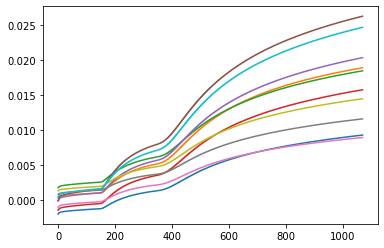

In [16]:
nr_variables = 10
nr_iterations = len(e)
print(nr_iterations)
for ii in range(nr_variables):
    plt.plot(list(range(nr_iterations)), e[:,ii])

In [ ]:
# def solve_constrained_prox_grad_gaines(objective:np.ndarray, data:np.ndarray, reg_param:float):
# Decided not to pursue this, as this is a path regularizer + start parameters are initialised
# using QP anyway.

# The question remains: is QP faster than the path method? (even for small params).

In [37]:
    def prox_operator_cvxopt(data_points:np.ndarray, objective:np.ndarray, reg_parameter:float) -> np.ndarray:
        print('Before: alpha=' + str(reg_parameter) + ' ' + str(objective))
        if True:
            n = len(objective)

            v = objective.reshape((n, 1))
            alpha = reg_parameter
            q = alpha * np.ones((2 * n, 1)) - np.vstack([v, -v])

            # The order of operations is: C -> -C -> (C, -C) -> add one row to it, ensuring positivity of beta aka a
            # row of -1s; d is 2n x 1 of 0s.
            C = data_points
            xC, yC = C.shape
            C = -C  # Since we want our ineq to be greater than or equal to zero.
            G = np.hstack([C, -C])

            # Not sure if this will work.
            G = np.vstack([G, -np.ones((1, 2 * yC))])
            print(G.shape)
            G = Constrained_Prox_Grad_Fitter.remove_dependent_rows(G)
            print(G.shape)
            h = np.zeros((G.shape[0], 1))

            P = np.zeros((2 * n, 2 * n))
            P[0:n, 0:n] = np.identity(n)
            P[n:2 * n, 0:n] = -np.identity(n)
            P[0:n, n:2 * n] = -np.identity(n)
            P[n:2 * n, n:2 * n] = np.identity(n)

            P = cvxopt.matrix(P, tc='d')
            q = cvxopt.matrix(q, tc='d')
            G = cvxopt.matrix(G, tc='d')
            h = cvxopt.matrix(h, tc='d')
            solution = cvxopt.solvers.qp(P, q, G, h, kktsolver='ldl', options={'kktreg': 1e-9, 'show_progress': False,
                                                                               'maxiters': 500})

            beta_2n = np.array(solution['x']).reshape((2 * n,))
            beta = beta_2n[:n] - beta_2n[n:]

            print("After: " + str(beta))
            print("Status: " + str(solution['status'] + ' ' + str(solution['iterations'])))
            return beta, beta_2n

In [44]:
objective = np.zeros((10, ))
objective[0] = 1
beta = prox_operator_osqp(samples, objective, reg_parameter=1)
print(beta2n)
print(beta)

Before: alpha=1 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(151, 20)
(11, 20)
[ 5.00000000e-01 -3.79999785e-11  3.18380733e-10 -3.81704800e-11
 -3.81704800e-11  3.18380733e-10 -1.46282057e-10 -2.74406034e-10
  3.18380733e-10 -3.81704800e-11 -5.00000000e-01 -3.79999785e-11
  3.18380656e-10 -3.81704589e-11 -3.81704589e-11  3.18380656e-10
 -1.46281976e-10 -2.74406008e-10  3.18380656e-10 -3.81704589e-11]
After: [ 1.00000000e+00 -1.35063084e-24  7.65391635e-17 -2.10893120e-17
 -2.10893120e-17  7.65391635e-17 -8.11976728e-17 -2.56868783e-17
  7.65391635e-17 -2.10893120e-17]
[ 4.99999696e-01  5.00875265e-05  4.22656237e-05  9.09708869e-05
  9.08869620e-05  1.09170270e-04  2.88633653e-05  4.65018566e-05
  1.32797981e-04  8.63086549e-05 -5.00000317e-01 -4.72001852e-05
 -4.29568727e-05 -9.06854880e-05 -9.15920369e-05 -1.06790862e-04
 -2.92343618e-05 -4.58984725e-05 -1.34387143e-04 -8.84836743e-05]
(array([ 1.00000000e+00, -1.35063084e-24,  7.65391635e-17, -2.10893120e-17,
       -2.10893120e-17,  7.6539163

/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/qpsolvers/osqp_.py:101: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a csc_matrix rather than as a numpy.ndarray
  warn(conversion_warning("P"))
/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/qpsolvers/osqp_.py:122: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a csc_matrix rather than as a numpy.ndarray
  warn(conversion_warning("G"))


In [39]:
def prox_operator_quadprog(data_points:np.ndarray, objective:np.ndarray, reg_parameter:float) -> np.ndarray:
    print('Before: alpha=' + str(reg_parameter) + ' ' + str(objective))
    if True:
        n = len(objective)

        v = objective.reshape((n, 1))
        alpha = reg_parameter
        q = alpha * np.ones((2*n, 1)) - np.vstack([v, -v])
        q = q.reshape((2*n, ))

        # The order of operations is: C -> -C -> (C, -C) -> add one row to it, ensuring positivity of beta aka a
        # row of -1s; d is 2n x 1 of 0s.
        C = data_points
        xC, yC = C.shape
        G = np.hstack([C, -C])

        # Not sure if this will work.
        G = np.vstack([G, np.ones((1, 2 * yC))])
        G = Constrained_Prox_Grad_Fitter.remove_dependent_rows(G)
        h = np.zeros((G.shape[0],))

        P = np.zeros((2*n, 2*n))
        P[0:n, 0:n] = np.identity(n)
        P[n:2*n, 0:n] = -np.identity(n)
        P[0:n, n:2*n] = -np.identity(n)
        P[n:2*n, n:2*n] = np.identity(n)

        print(G.shape)
        solution = solve_qp(P, -q, G.T, h)
        print(solution)

        beta_2n = np.array(solution['x']).reshape((2 * n,))
        beta = beta_2n[:n] - beta_2n[n:]

        print("After: " + str(beta))
        print("Status: " + str(solution['status'] + ' ' + str(solution['iterations'])))
        return beta 


In [40]:
def prox_operator_qpoases(data_points:np.ndarray, objective:np.ndarray, reg_parameter:float) -> np.ndarray:
    print('Before: alpha=' + str(reg_parameter) + ' ' + str(objective))
    if True:
        n = len(objective)

        v = objective.reshape((n, 1))
        alpha = reg_parameter

        q = alpha * np.ones((2*n, 1)) - np.vstack([v, -v])
        q = q.reshape((2*n, ))

        # The order of operations is: C -> -C -> (C, -C) -> add one row to it, ensuring positivity of beta aka a
        # row of -1s; d is 2n x 1 of 0s.
        C = data_points
        xC, yC = C.shape
        C = -C  # Since we want our ineq to be greater than or equal to zero.
        G = np.hstack([C, -C])

        # Not sure if this will work.
        G = np.vstack([G, -np.ones((1, 2 * yC))])
        print(G.shape)
        G = Constrained_Prox_Grad_Fitter.remove_dependent_rows(G)
        print(G.shape)
        h = np.zeros((G.shape[0], ))

        P = np.zeros((2 * n, 2 * n))
        P[0:n, 0:n] = np.identity(n)
        P[n:2 * n, 0:n] = -np.identity(n)
        P[0:n, n:2 * n] = -np.identity(n)
        P[n:2 * n, n:2 * n] = np.identity(n)
        
        solution = qpsolvers.qpoases_solve_qp(P, q, G, h)
        print(solution)

        beta_2n = solution.reshape((2 * n,))
        beta = beta_2n[:n] - beta_2n[n:]

        print("After: " + str(beta))
        return beta, beta_2n

In [41]:
def prox_operator_osqp(data_points:np.ndarray, objective:np.ndarray, reg_parameter:float) -> np.ndarray:
    print('Before: alpha=' + str(reg_parameter) + ' ' + str(objective))
    if True:
        n = len(objective)

        v = objective.reshape((n, 1))
        alpha = reg_parameter

        q = alpha * np.ones((2*n, 1)) - np.vstack([v, -v])
        q = q.reshape((2*n, ))

        # The order of operations is: C -> -C -> (C, -C) -> add one row to it, ensuring positivity of beta aka a
        # row of -1s; d is 2n x 1 of 0s.
        C = data_points
        xC, yC = C.shape
        C = -C  # Since we want our ineq to be greater than or equal to zero.
        G = np.hstack([C, -C])

        # Not sure if this will work.
        G = np.vstack([G, -np.ones((1, 2 * yC))])
        print(G.shape)
        G = Constrained_Prox_Grad_Fitter.remove_dependent_rows(G)
        print(G.shape)
        h = np.zeros((G.shape[0], ))

        P = np.zeros((2 * n, 2 * n))
        P[0:n, 0:n] = np.identity(n)
        P[n:2 * n, 0:n] = -np.identity(n)
        P[0:n, n:2 * n] = -np.identity(n)
        P[n:2 * n, n:2 * n] = np.identity(n)
        
        solution = qpsolvers.osqp_solve_qp(P, q, G, h)
        print(solution)

        beta_2n = solution.reshape((2 * n,))
        beta = beta_2n[:n] - beta_2n[n:]

        print("After: " + str(beta))
        return beta, beta_2n

In [9]:
objective = np.zeros((10, ))
objective[0] = 1
beta, beta2n = prox_operator_osqp(samples, objective, reg_parameter=2)
print(beta2n)
print(beta)

Before: alpha=2 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(151, 20)
(11, 20)
[ 5.00000000e-01  4.42121763e-13 -3.34728758e-10  6.53156611e-11
  6.53156099e-11 -3.39018760e-11 -3.39019172e-11  6.53156860e-11
  6.53156860e-11  6.53155837e-11 -5.00000000e-01  4.42109064e-13
 -3.34728939e-10  6.53157038e-11  6.53157550e-11 -3.39019584e-11
 -3.39019172e-11  6.53156789e-11  6.53156789e-11  6.53157812e-11]
After: [ 1.00000000e+00  1.26991642e-17  1.80868454e-16 -4.27121372e-17
 -1.45078061e-16  8.23489330e-17  6.46234854e-27  7.11977322e-18
  7.11977322e-18 -1.97413023e-16]
[ 5.00000000e-01  4.42121763e-13 -3.34728758e-10  6.53156611e-11
  6.53156099e-11 -3.39018760e-11 -3.39019172e-11  6.53156860e-11
  6.53156860e-11  6.53155837e-11 -5.00000000e-01  4.42109064e-13
 -3.34728939e-10  6.53157038e-11  6.53157550e-11 -3.39019584e-11
 -3.39019172e-11  6.53156789e-11  6.53156789e-11  6.53157812e-11]
[ 1.00000000e+00  1.26991642e-17  1.80868454e-16 -4.27121372e-17
 -1.45078061e-16  8.23489330e-17  6.46234854e

/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/qpsolvers/osqp_.py:101: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a csc_matrix rather than as a numpy.ndarray
  warn(conversion_warning("P"))
/home/mcio/miniconda3/envs/mpgm/lib/python3.8/site-packages/qpsolvers/osqp_.py:122: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a csc_matrix rather than as a numpy.ndarray
  warn(conversion_warning("G"))


In [12]:
# Need to write + test a projection operator onto the intersection of halfspaces.
# scipy.optimize.minimize? How fast is it?
def l2norm(x:np.ndarray, objective:np.ndarray, reg_param:float) -> float:
    sq_norm = (x-objective)**2
    return np.sum(sq_norm) * 1/(2 * reg_param)

def jac_l2norm(x:np.ndarray, objective:np.ndarray, reg_param:float) -> np.ndarray:
    return (x-objective)/reg_param

# def constraint(x:np.ndarray, data_point:np.ndarray, node):
#     inequality_lh = np.dot(x, data_point) - x[node] * data_point[node] + x[node]
#     return inequality_lh >= 0

# def constraint_jac(x:np.ndarray, data_point:np.ndarray, node:int) -> np.ndarray:
#     jac = np.array(data_point)
#     jac[node] = 1
#     return jac

# def construct_constraints(data:np.ndarray, node:int) -> Dict[Any, Any]:
#     dict_seq = []
#     reduced_data = Constrained_Prox_Grad_Fitter.remove_dependent_rows(data)
#     for ii in range(reduced_data.shape[0]):
#         data_point = reduced_data[ii, :]
#         constraint_dict = dict()
#         constraint_dict['type'] = 'ineq'
#         constraint_dict['fun'] = partial(constraint, data_point=data_point, node=node)
#         constraint_dict['jac'] = partial(constraint_jac, data_point=data_point, node=node)
#         dict_seq.append(constraint_dict)
#     return dict_seq

def construct_constraints(data:np.ndarray, node:int):
    A = np.copy(data)
    A[:, node] = 1
    constraints = scipy.optimize.LinearConstraint(A, 0, np.inf, keep_feasible=False)
    return constraints

def soft_thresholding_operator(objective:np.ndarray, reg_parameter:float) -> np.ndarray:
    obj_plus = objective - reg_parameter
    obj_minus = objective + reg_parameter
    return obj_plus * (obj_plus > 0) + obj_minus * (obj_minus < 0)

# Disagree with this.
def check_convergence(x:np.ndarray, z:np.ndarray, threshold:Optional[float]=1e-3):
    converged_params = (x - z) ** 2 <= (threshold ** 2) * (x ** 2)
    all_converged = all(converged_params)
    return all_converged

In [34]:
def prox_operator_admm(data_points:np.ndarray, 
                       objective:np.ndarray, 
                       reg_parameter:float, 
                       node:int, 
                       tau:Optional[float]=0.1,
                       min_iter:Optional[int]=100,
                       max_iter:Optional[int]=1000) -> np.ndarray:
    n = len(objective)
    u = np.zeros((n,))
    z = np.copy(objective)
    x = np.copy(objective)
    
    new_reg_parameter = reg_parameter/(1+tau)
    
    f_operator = partial(soft_thresholding_operator, 
                         reg_parameter=new_reg_parameter)
    
    # Need to specify: x0, jac and fun.
    g_operator = partial(scipy.optimize.minimize, 
                         method="SLSQP",
                         constraints=construct_constraints(data_points, node))
    
    # Found bug: this flavor of ADMM makes x converge to -z. 
    # Since z is the result of g_operator, keeping constraints true for x, means
    # multiplying them by -1 to keep them true for z (if it makes sense).
    
    # STOOOPID.
    
    iteration = 0
    while (iteration <= min_iter or not check_convergence(x, z)) and iteration <= max_iter:
        print(iteration)
        
        prior_lasso_objective = (objective + tau*(z-u))/(1+tau)
        
        print(prior_lasso_objective)
        
        x = f_operator(prior_lasso_objective)
        
        fun = partial(l2norm, objective=x+u, reg_param=1.0)
        jac = partial(jac_l2norm, objective=x+u, reg_param=1.0)
        z = g_operator(x0=(x+u), fun=fun, jac=jac)['x']
        
        u = u + x - z
        
        iteration += 1
        
        print(x)
        print(z)
    
    return x, z

In [35]:
objective = np.random.normal(0, 0.1, (10, ))
objective

array([ 0.09159103,  0.17134248, -0.05552142, -0.03294018,  0.07096982,
       -0.09134358,  0.05778199, -0.09372446, -0.19629298, -0.03809065])

In [36]:
x, z = prox_operator_admm(data_points=samples,
                      objective=objective,
                      reg_parameter=0.01,
                      node=0,
                      max_iter=100)

0
[ 0.09159103  0.17134248 -0.05552142 -0.03294018  0.07096982 -0.09134358
  0.05778199 -0.09372446 -0.19629298 -0.03809065]
[ 0.08250012  0.16225158 -0.04643051 -0.02384927  0.06187891 -0.08225267
  0.04869108 -0.08463355 -0.18720207 -0.02899974]
[ 0.0332503   0.0499647  -0.04643051 -0.06452985  0.05212405 -0.12293324
  0.00431869 -0.08463355 -0.18720207 -0.03756898]
1
[ 0.08181007  0.15010024 -0.05469497 -0.0395102   0.06836976 -0.0979136
  0.04888783 -0.09289801 -0.19546653 -0.03882224]
[ 0.07271916  0.14100933 -0.04560406 -0.0304193   0.05927885 -0.08882269
  0.03979692 -0.0838071  -0.18637562 -0.02973134]
[ 0.0328032   0.0495989  -0.04560406 -0.06348663  0.05148728 -0.12189003
  0.00377675 -0.0838071  -0.18637562 -0.03657996]
2
[ 0.0781407   0.14175695 -0.05461984 -0.04242149  0.06760355 -0.10082488
  0.04556401 -0.09282288 -0.1953914  -0.03935493]
[ 0.06904979  0.13266604 -0.04552893 -0.03333058  0.05851264 -0.09173397
  0.0364731  -0.08373197 -0.18630049 -0.03026403]
[ 0.0327625

In [82]:
x

array([-23.79052454, -23.72687537, -24.0426352 , -23.97635005,
       -23.79407879, -23.52850209, -23.72689923, -23.61790807,
       -23.93272802, -23.54318791])

In [1]:
z

NameError: name 'z' is not defined

In [84]:
x + z

array([-1.42108547e-14, -3.55271368e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.55271368e-15,  3.55271368e-15,  0.00000000e+00,
       -3.55271368e-15, -3.55271368e-15])

In [5]:
from scipy.optimize import linprog
import numpy as np

c = np.zeros(6)
c[5] = 1
A = np.array([[1, 2, 7, 2, 4],
             [0, 0, 9, 6, 2],
             [7, 9, 4, 5, 3],
             [1, 4, 0, 7, 9],
             [9, 7, 3, 8, 3]])
A_ub = np.hstack((A, -np.ones((5,1))))
b_ub = np.zeros(5)

A_eq = np.ones((1, 6))
A_eq[0, 5] = 0
b_eq = np.ones(1)

# Default bounds are (0, None).
x = linprog(c, A_ub, b_ub, A_eq, b_eq)
print(x)

     con: array([-1.1925998e-09])
     fun: 4.317073170051477
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([-4.27055857e-09,  4.79674792e-01,  1.13821130e-01, -4.76381336e-09,
       -8.41605430e-09])
  status: 0
 success: True
       x: array([2.19512195e-01, 2.48451964e-10, 3.25203252e-01, 2.44575918e-10,
       4.55284553e-01, 4.31707317e+00])


In [2]:
import scipy

In [3]:
scipy.optimize.LinearConstraint()

TypeError: __init__() missing 3 required positional arguments: 'A', 'lb', and 'ub'